In [1]:
import pymatgen
from pymatgen.ext.matproj import MPRester
m = MPRester('J9RM5ogTNGLHFamO')
q= m.query({'e_above_hull':{'$lt':0.1},'band_gap':{'$gt':0.1}},['material_id','piezo','spacegroup','structure'], chunk_size=500, max_tries_per_chunk=5, mp_decode=True)

ModuleNotFoundError: No module named 'pymatgen'

In [2]:
X=[]
Y=[]
for i in range(len(q)):
    sn=q[i]['spacegroup']['number']
    if (sn==1 or 3<=sn<=9 or 16<=sn<=46 or 75<=sn<=82 or 89<=sn<=122 or 143<=sn<=146 or 149<=sn<=161 or 168<=sn<=174 or 177<=sn<=190 or 195<=sn<=199 or 207<=sn<=220):
        if q[i]['piezo']==None:
            Y.append([q[i]['material_id'],q[i]['structure']])
        else:
            X.append([q[i]['material_id'],q[i]['structure'],q[i]['piezo']['eij_max']])

In [3]:
import pandas as pd
df = pd.DataFrame(X, columns=['material_id','structure','piezo'])

In [4]:
from matminer.featurizers.structure.composite import JarvisCFID

df = JarvisCFID().featurize_dataframe(df, 'structure',ignore_errors=True)

JarvisCFID:   0%|          | 0/2975 [00:00<?, ?it/s]

In [5]:
df

,material_id,structure,piezo,jml_bp_mult_atom_rad,jml_hfus_add_bp,jml_elec_aff_mult_voro_coord,jml_mol_vol_subs_atom_mass,jml_is_halogen,jml_atom_mass_subs_first_ion_en,jml_row,...,jml_nn_91,jml_nn_92,jml_nn_93,jml_nn_94,jml_nn_95,jml_nn_96,jml_nn_97,jml_nn_98,jml_nn_99,jml_nn_100
0,mp-1025377,"[[0. 0. 0.] Cd, [0. 3.290139 3.2405505...",0.444920,2049.453333,1310.884233,9.944000,-99.397890,0.333333,106.720787,5.000000,...,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,mp-1025567,"[[1.81295896 7.51818954 1.83726387] Nb, [1.812...",3.728118,2522.626667,1782.214733,8.933333,-32.926260,0.333333,37.004750,3.333333,...,4.500000,2.000000,11.000000,7.500000,6.000000,3.500000,3.500000,2.250000,2.750000,3.000000
2,mp-1029262,"[[4.70426016 0. 2.4422491 ] V, [0.9094...",1.694972,2203.761333,1645.883077,1.756667,-33.112400,0.000000,33.227570,3.333333,...,7.000000,13.000000,8.666667,12.666667,4.000000,8.666667,10.666667,8.333333,4.000000,12.000000
3,mp-1029368,"[[4.85438115 1.63560608 2.66919156] Mg, [ 4.85...",1.949640,2354.261333,1706.887783,1.756667,-17.797733,0.000000,20.108892,3.000000,...,8.666667,10.333333,12.000000,7.333333,5.333333,4.333333,6.666667,5.000000,6.666667,9.000000
4,mp-10419,"[[1.13097585 5.34190682 6.99578698] Na, [1.092...",0.983862,3351.411333,2367.576783,2.762000,-59.007823,0.000000,65.232258,3.666667,...,6.250000,6.000000,7.500000,6.000000,3.750000,4.250000,5.250000,5.750000,5.750000,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,mp-756353,"[[ 0.82039709 3.18928428 -5.68994261] Li, [-1...",0.299852,1706.496250,1231.100712,5.810000,-12.278451,0.250000,13.362209,2.500000,...,1.333333,0.666667,1.666667,0.500000,0.833333,0.833333,0.500000,0.833333,1.000000,1.333333
2971,mp-756775,"[[0.50906234 4.08046631 4.99094134] Li, [ 0.40...",1.287492,2434.392500,1781.624513,4.516250,-23.812375,0.000000,28.220980,3.000000,...,11.562500,6.125000,5.187500,4.062500,6.000000,7.000000,7.187500,12.562500,16.625000,14.875000
2972,mp-758191,[[9.81988195e+00 3.98152940e-05 6.35044959e+00...,1.424887,2448.367500,2285.136075,4.094250,-12.009025,0.000000,13.155908,2.500000,...,12.125000,8.000000,9.750000,8.875000,12.125000,11.500000,9.750000,13.062500,11.875000,11.937500
2973,mp-849525,"[[1.53066973 7.81217041 1.84749652] Li, [-1.53...",0.321191,1706.496250,1231.100712,5.810000,-12.278451,0.250000,13.362209,2.500000,...,10.307692,13.538462,8.923077,8.307692,5.538462,7.384615,9.538462,14.153846,14.153846,10.461538


In [6]:
df.to_csv('cfid.csv')

In [15]:
df = df.drop(['material_id','structure','piezo'],axis=1)

In [16]:
df

,jml_bp_mult_atom_rad,jml_hfus_add_bp,jml_elec_aff_mult_voro_coord,jml_mol_vol_subs_atom_mass,jml_is_halogen,jml_atom_mass_subs_first_ion_en,jml_row,jml_mol_vol_mult_atom_mass,jml_voro_coord_divi_therm_cond,jml_voro_coord_subs_mp,...,jml_nn_91,jml_nn_92,jml_nn_93,jml_nn_94,jml_nn_95,jml_nn_96,jml_nn_97,jml_nn_98,jml_nn_99,jml_nn_100
0,2049.453333,1310.884233,9.944000,-99.397890,0.333333,106.720787,5.000000,1944.377461,3.755619,-729.666667,...,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2522.626667,1782.214733,8.933333,-32.926260,0.333333,37.004750,3.333333,633.484450,187.496735,-986.466667,...,4.500000,2.000000,11.000000,7.500000,6.000000,3.500000,3.500000,2.250000,2.750000,3.000000
2,2203.761333,1645.883077,1.756667,-33.112400,0.000000,33.227570,3.333333,404.210146,38.849978,-971.910000,...,7.000000,13.000000,8.666667,12.666667,4.000000,8.666667,10.666667,8.333333,4.000000,12.000000
3,2354.261333,1706.887783,1.756667,-17.797733,0.000000,20.108892,3.000000,317.917999,38.847200,-1048.016667,...,8.666667,10.333333,12.000000,7.333333,5.333333,4.333333,6.666667,5.000000,6.666667,9.000000
4,3351.411333,2367.576783,2.762000,-59.007823,0.000000,65.232258,3.666667,795.380484,38.826578,-1288.640000,...,6.250000,6.000000,7.500000,6.000000,3.750000,4.250000,5.250000,5.750000,5.750000,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,1706.496250,1231.100712,5.810000,-12.278451,0.250000,13.362209,2.500000,244.211142,59.865814,-586.630000,...,1.333333,0.666667,1.666667,0.500000,0.833333,0.833333,0.500000,0.833333,1.000000,1.333333
2971,2434.392500,1781.624513,4.516250,-23.812375,0.000000,28.220980,3.000000,391.696152,28.315815,-740.850000,...,11.562500,6.125000,5.187500,4.062500,6.000000,7.000000,7.187500,12.562500,16.625000,14.875000
2972,2448.367500,2285.136075,4.094250,-12.009025,0.000000,13.155908,2.500000,206.899764,28.282723,-1523.372500,...,12.125000,8.000000,9.750000,8.875000,12.125000,11.500000,9.750000,13.062500,11.875000,11.937500
2973,1706.496250,1231.100712,5.810000,-12.278451,0.250000,13.362209,2.500000,244.211142,59.865814,-586.630000,...,10.307692,13.538462,8.923077,8.307692,5.538462,7.384615,9.538462,14.153846,14.153846,10.461538


In [8]:
df1 = pd.read_csv('strcom.csv')

In [10]:
df1 = df1.drop(['Unnamed: 0'],axis=1)

In [17]:
df1 = df1.drop(['piezo'],axis=1)

In [18]:
df1

,mean absolute deviation in relative bond length,max relative bond length,min relative bond length,minimum neighbor distance variation,maximum neighbor distance variation,range neighbor distance variation,mean neighbor distance variation,avg_dev neighbor distance variation,mean absolute deviation in relative cell size,xrd_0,...,band center,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,dist from 1 clusters |APE| < 0.010,dist from 3 clusters |APE| < 0.010,dist from 5 clusters |APE| < 0.010,piezo_cl
0,0.053873,1.047139,0.933305,0.153749,0.223769,0.070019,0.193837,0.034208,0.077405,3.180761e-22,...,5.653612,0.209607,0.038059,-0.267904,-0.204228,0.063676,0.701020,0.703350,0.710769,0
1,0.086567,1.094726,0.808986,0.017166,0.209501,0.192336,0.144666,0.059831,0.144966,5.131174e-43,...,5.948123,0.792998,0.142625,-0.338381,-0.338381,0.000000,0.042426,0.053001,0.061556,0
2,0.155617,1.218440,0.612015,0.020766,0.235647,0.214881,0.153107,0.076257,0.265675,1.158487e-32,...,5.728818,0.820234,0.142420,-0.338381,-0.338381,0.000000,0.043640,0.055786,0.063077,0
3,0.129469,1.254851,0.679094,0.030068,0.223482,0.193414,0.152875,0.073002,0.212210,7.273192e-60,...,6.310468,0.917619,0.214967,-0.415606,-0.205744,0.209862,0.659829,0.662359,0.663807,0
4,0.085523,1.183043,0.746470,0.079370,0.185899,0.106529,0.156439,0.020435,0.139278,9.928956e-41,...,5.125398,0.792998,0.178436,-0.338381,-0.338381,0.000000,0.027835,0.037396,0.045798,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,0.117433,1.159500,0.804933,0.008878,0.204109,0.195231,0.128550,0.072965,0.222814,2.357938e-43,...,7.017906,0.894601,0.162920,-0.295049,-0.295049,0.000000,0.578102,0.579302,0.581360,0
2971,0.025918,1.056057,0.947495,0.136588,0.165095,0.028507,0.149580,0.008748,0.041882,1.507887e-24,...,4.866179,0.779730,0.169250,-0.328019,-0.328019,0.000000,0.028972,0.040004,0.045299,1
2972,0.083471,1.104596,0.785115,0.070526,0.409067,0.338542,0.234576,0.076158,0.117423,1.594988e-53,...,6.032056,0.779730,0.123519,-0.295049,-0.295049,0.000000,0.048762,0.057012,0.061114,1
2973,0.102300,1.171440,0.852761,0.024214,0.218953,0.194740,0.138593,0.067900,0.168933,2.875361e-42,...,6.413407,0.894601,0.178934,-0.295049,-0.295049,0.000000,0.444659,0.447249,0.449899,0


In [23]:
df2 = pd.concat([df,df1],axis=1)

In [24]:
df2

,jml_bp_mult_atom_rad,jml_hfus_add_bp,jml_elec_aff_mult_voro_coord,jml_mol_vol_subs_atom_mass,jml_is_halogen,jml_atom_mass_subs_first_ion_en,jml_row,jml_mol_vol_mult_atom_mass,jml_voro_coord_divi_therm_cond,jml_voro_coord_subs_mp,...,band center,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,dist from 1 clusters |APE| < 0.010,dist from 3 clusters |APE| < 0.010,dist from 5 clusters |APE| < 0.010,piezo_cl
0,2049.453333,1310.884233,9.944000,-99.397890,0.333333,106.720787,5.000000,1944.377461,3.755619,-729.666667,...,5.653612,0.209607,0.038059,-0.267904,-0.204228,0.063676,0.701020,0.703350,0.710769,0
1,2522.626667,1782.214733,8.933333,-32.926260,0.333333,37.004750,3.333333,633.484450,187.496735,-986.466667,...,5.948123,0.792998,0.142625,-0.338381,-0.338381,0.000000,0.042426,0.053001,0.061556,0
2,2203.761333,1645.883077,1.756667,-33.112400,0.000000,33.227570,3.333333,404.210146,38.849978,-971.910000,...,5.728818,0.820234,0.142420,-0.338381,-0.338381,0.000000,0.043640,0.055786,0.063077,0
3,2354.261333,1706.887783,1.756667,-17.797733,0.000000,20.108892,3.000000,317.917999,38.847200,-1048.016667,...,6.310468,0.917619,0.214967,-0.415606,-0.205744,0.209862,0.659829,0.662359,0.663807,0
4,3351.411333,2367.576783,2.762000,-59.007823,0.000000,65.232258,3.666667,795.380484,38.826578,-1288.640000,...,5.125398,0.792998,0.178436,-0.338381,-0.338381,0.000000,0.027835,0.037396,0.045798,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,1706.496250,1231.100712,5.810000,-12.278451,0.250000,13.362209,2.500000,244.211142,59.865814,-586.630000,...,7.017906,0.894601,0.162920,-0.295049,-0.295049,0.000000,0.578102,0.579302,0.581360,0
2971,2434.392500,1781.624513,4.516250,-23.812375,0.000000,28.220980,3.000000,391.696152,28.315815,-740.850000,...,4.866179,0.779730,0.169250,-0.328019,-0.328019,0.000000,0.028972,0.040004,0.045299,1
2972,2448.367500,2285.136075,4.094250,-12.009025,0.000000,13.155908,2.500000,206.899764,28.282723,-1523.372500,...,6.032056,0.779730,0.123519,-0.295049,-0.295049,0.000000,0.048762,0.057012,0.061114,1
2973,1706.496250,1231.100712,5.810000,-12.278451,0.250000,13.362209,2.500000,244.211142,59.865814,-586.630000,...,6.413407,0.894601,0.178934,-0.295049,-0.295049,0.000000,0.444659,0.447249,0.449899,0


In [78]:
df2.dtypes

jml_bp_mult_atom_rad                  float64
jml_hfus_add_bp                       float64
jml_elec_aff_mult_voro_coord          float64
jml_mol_vol_subs_atom_mass            float64
jml_is_halogen                        float64
                                       ...   
gap_AO                                float64
dist from 1 clusters |APE| < 0.010    float64
dist from 3 clusters |APE| < 0.010    float64
dist from 5 clusters |APE| < 0.010    float64
piezo_cl                                int64
Length: 1924, dtype: object

In [80]:
df2.describe()

,jml_bp_mult_atom_rad,jml_hfus_add_bp,jml_elec_aff_mult_voro_coord,jml_mol_vol_subs_atom_mass,jml_is_halogen,jml_atom_mass_subs_first_ion_en,jml_row,jml_mol_vol_mult_atom_mass,jml_voro_coord_divi_therm_cond,jml_voro_coord_subs_mp,...,band center,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,dist from 1 clusters |APE| < 0.010,dist from 3 clusters |APE| < 0.010,dist from 5 clusters |APE| < 0.010,piezo_cl
count,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,...,2962.000000,2975.000000,2975.000000,2974.000000,2974.000000,2974.000000,2886.000000,2886.000000,2886.000000,2975.000000
mean,2196.566487,1569.467095,5.414434,-40.391303,0.069270,47.625907,3.488472,1062.076499,36.664494,-778.197566,...,5.630515,0.549253,0.104829,-0.281598,-0.248131,0.033467,0.188802,0.208992,0.228885,0.217479
std,1012.772088,710.886461,2.402089,31.128593,0.146196,32.911380,0.900952,830.284496,37.028161,420.663383,...,0.988851,0.262443,0.053716,0.059410,0.065248,0.058004,0.280400,0.275334,0.276367,0.412600
min,23.792500,48.824775,0.000000,-186.500000,0.000000,-6.558952,1.500000,29.485482,0.027381,-2800.000000,...,2.873570,0.000000,0.000000,-0.415606,-0.415606,0.000000,0.000000,0.008497,0.028079,0.000000
25%,1553.367500,1103.545733,3.754675,-59.270168,0.000000,19.546450,2.750000,405.703733,7.245379,-1001.626667,...,4.950653,0.329718,0.063458,-0.338381,-0.295334,0.000000,0.030351,0.047140,0.057925,0.000000
50%,2114.990000,1547.332456,5.055000,-34.159735,0.000000,42.105385,3.333333,857.022220,33.561383,-725.830000,...,5.585050,0.582815,0.107534,-0.267904,-0.245806,0.000000,0.047140,0.066901,0.082359,0.000000
75%,2749.540000,2001.252617,6.695100,-14.835023,0.000000,68.289930,4.000000,1492.157409,43.197900,-480.634583,...,6.224626,0.779730,0.148094,-0.245806,-0.202272,0.051498,0.206934,0.223297,0.260386,0.000000
max,6289.483333,4229.540300,19.108000,6.204787,1.000000,190.152500,7.000000,6019.504379,281.152510,-30.520000,...,9.877133,0.921450,0.228217,-0.101634,-0.078699,0.310066,1.000000,1.000000,1.000000,1.000000


In [25]:
df2.to_csv('strcom_cfid.csv')

In [26]:
df3 = df2.dropna(axis=0, how='any')

In [27]:
df3

,jml_bp_mult_atom_rad,jml_hfus_add_bp,jml_elec_aff_mult_voro_coord,jml_mol_vol_subs_atom_mass,jml_is_halogen,jml_atom_mass_subs_first_ion_en,jml_row,jml_mol_vol_mult_atom_mass,jml_voro_coord_divi_therm_cond,jml_voro_coord_subs_mp,...,band center,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,dist from 1 clusters |APE| < 0.010,dist from 3 clusters |APE| < 0.010,dist from 5 clusters |APE| < 0.010,piezo_cl
0,2049.453333,1310.884233,9.944000,-99.397890,0.333333,106.720787,5.000000,1944.377461,3.755619,-729.666667,...,5.653612,0.209607,0.038059,-0.267904,-0.204228,0.063676,0.701020,0.703350,0.710769,0
1,2522.626667,1782.214733,8.933333,-32.926260,0.333333,37.004750,3.333333,633.484450,187.496735,-986.466667,...,5.948123,0.792998,0.142625,-0.338381,-0.338381,0.000000,0.042426,0.053001,0.061556,0
2,2203.761333,1645.883077,1.756667,-33.112400,0.000000,33.227570,3.333333,404.210146,38.849978,-971.910000,...,5.728818,0.820234,0.142420,-0.338381,-0.338381,0.000000,0.043640,0.055786,0.063077,0
3,2354.261333,1706.887783,1.756667,-17.797733,0.000000,20.108892,3.000000,317.917999,38.847200,-1048.016667,...,6.310468,0.917619,0.214967,-0.415606,-0.205744,0.209862,0.659829,0.662359,0.663807,0
4,3351.411333,2367.576783,2.762000,-59.007823,0.000000,65.232258,3.666667,795.380484,38.826578,-1288.640000,...,5.125398,0.792998,0.178436,-0.338381,-0.338381,0.000000,0.027835,0.037396,0.045798,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,1706.496250,1231.100712,5.810000,-12.278451,0.250000,13.362209,2.500000,244.211142,59.865814,-586.630000,...,7.017906,0.894601,0.162920,-0.295049,-0.295049,0.000000,0.578102,0.579302,0.581360,0
2971,2434.392500,1781.624513,4.516250,-23.812375,0.000000,28.220980,3.000000,391.696152,28.315815,-740.850000,...,4.866179,0.779730,0.169250,-0.328019,-0.328019,0.000000,0.028972,0.040004,0.045299,1
2972,2448.367500,2285.136075,4.094250,-12.009025,0.000000,13.155908,2.500000,206.899764,28.282723,-1523.372500,...,6.032056,0.779730,0.123519,-0.295049,-0.295049,0.000000,0.048762,0.057012,0.061114,1
2973,1706.496250,1231.100712,5.810000,-12.278451,0.250000,13.362209,2.500000,244.211142,59.865814,-586.630000,...,6.413407,0.894601,0.178934,-0.295049,-0.295049,0.000000,0.444659,0.447249,0.449899,0


In [30]:
y = df3.iloc[:,1923].values

In [32]:
x = df3.iloc[:,0:1923].values

In [33]:
feat_labels = df3.columns[0:1923]

In [34]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(x,y)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [36]:
import numpy as np

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) vpa                            0.003945
 2) spacegroup_num                 0.003743
 3) avg_dev neighbor distance variation 0.003734
 4) density                        0.002915
 5) jml_ndunfill                   0.002898
 6) crystal_system_int             0.002673
 7) jml_mol_vol_divi_polzbl        0.002528
 8) maximum neighbor distance variation 0.002390
 9) jml_first_ion_en_divi_hfus     0.002352
10) jml_atom_rad_divi_hfus         0.002304
11) jml_voro_coord_divi_hfus       0.002299
12) range neighbor distance variation 0.002278
13) mean ordering parameter shell 2 0.002270
14) mean absolute deviation in relative bond length 0.002268
15) jml_oq_enp                     0.002236
16) jml_mol_vol_divi_therm_cond    0.002185
17) jml_vpa                        0.002167
18) transition metal fraction      0.002155
19) jml_mol_vol_divi_hfus          0.002154
20) jml_voro_coord_divi_therm_cond 0.002075
21) jml_atom_rad_divi_therm_cond   0.002013
22) jml_first_ion_en_divi_mp       0.001998
2

In [37]:
dist=[]
for i in range(x.shape[1]):
    dist.append(feat_labels[indices[i]])

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [42]:
def GBDT(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
    gbdt = GradientBoostingClassifier(learning_rate=0.1,n_estimators=80,max_depth=8, min_samples_split =7,random_state=0)
    gbdt.fit(X_train,y_train)
    
    y_predprob = gbdt.predict_proba(X_test)[:,1]
    return(metrics.roc_auc_score(y_test, y_predprob))

In [43]:
for i in range(60):
    df4 = df3[dist[0:1+i]]
    x1 = df4.values
    y1 = df3.iloc[:,1923].values
    
    print(GBDT(x1,y1),i)

0.608363201911589 0
0.7756869772998806 1
0.7985862206292313 2
0.8285742731979291 3
0.8419753086419753 4
0.8384508164078057 5
0.8581043409000397 6
0.854221425726802 7
0.867273994424532 8
0.8802070888092394 9
0.8732974910394266 10
0.8648546395858224 11
0.8542811628833133 12
0.8558144165671048 13
0.8625647152528872 14
0.8662883313420948 15
0.8640581441656711 16
0.8613301473516527 17
0.8710673038630028 18
0.865452011150936 19
0.8658900836320191 20
0.8726503385105535 21
0.8611310234966149 22
0.8632019115890084 23
0.8707885304659498 24
0.8615491835921945 25
0.8739147749900439 26
0.8603544404619674 27
0.8654719235364396 28
0.8771206690561529 29
0.8708980485862207 30
0.8520509757068897 31
0.8680804460374353 32
0.86415770609319 33
0.8648148148148148 34
0.8686180804460374 35
0.8679410593389089 36
0.8704898446833931 37
0.8754480286738352 38
0.8700318598168061 39
0.8689167662285942 40
0.8745121465551573 41
0.8634408602150538 42
0.864336917562724 43
0.8745121465551573 44
0.8682596575069693 45
0.859

In [44]:
df5 = df3[dist[0:10]]

In [48]:
df5

,vpa,spacegroup_num,avg_dev neighbor distance variation,density,jml_ndunfill,crystal_system_int,jml_mol_vol_divi_polzbl,maximum neighbor distance variation,jml_first_ion_en_divi_hfus,jml_atom_rad_divi_hfus
0,40.090293,121,0.034208,4.945340,0.000000,4,2.787869,0.223769,115.518496,19.053424
1,11.629333,122,0.059831,3.833648,2.000000,4,10.104253,0.209501,2205.930222,102.936869
2,16.555643,19,0.076257,3.101543,2.333333,5,4.851615,0.235647,1419.467335,69.492610
3,14.287718,173,0.073002,2.175750,2.333333,2,4.760123,0.223482,1405.219390,69.022114
4,13.089161,7,0.020435,2.574819,1.666667,6,4.736269,0.185899,1438.251709,85.430209
...,...,...,...,...,...,...,...,...,...,...
2970,13.185748,1,0.072965,3.363133,1.000000,7,10.783171,0.204109,3314.859896,131.819155
2971,11.351597,1,0.008748,3.811793,1.250000,7,6.064349,0.165095,1627.346568,87.750977
2972,10.842046,38,0.076158,2.925293,1.000000,5,6.548157,0.409067,1609.140098,82.948610
2973,11.820726,8,0.067900,3.505517,1.000000,6,10.783171,0.218953,3314.859896,131.819155


In [81]:
df5.describe()

,vpa,spacegroup_num,avg_dev neighbor distance variation,density,jml_ndunfill,crystal_system_int,jml_mol_vol_divi_polzbl,maximum neighbor distance variation,jml_first_ion_en_divi_hfus,jml_atom_rad_divi_hfus
count,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000
mean,18.298316,88.588543,0.047121,4.194252,0.771638,4.124345,7.002820,0.221307,1497.065957,76.753398
std,8.769809,76.116404,0.027937,1.788941,1.117674,1.753277,4.136028,0.090121,1099.727401,41.628676
min,5.959285,1.000000,0.000000,0.222775,0.000000,1.000000,1.202247,0.033480,12.913285,1.393525
25%,12.401963,19.000000,0.027091,2.915483,0.000000,3.000000,3.233827,0.163463,246.206630,36.305083
50%,15.484988,81.000000,0.044578,3.859319,0.000000,4.000000,6.717686,0.198942,1614.632671,83.523928
75%,22.522460,160.000000,0.066013,5.099062,1.666667,5.000000,9.045686,0.260362,2142.793940,104.685354
max,201.554089,220.000000,0.174955,13.160492,5.666667,7.000000,37.460443,0.638381,4541.489831,193.409259


In [45]:
x5 = df5.values

In [46]:
GBDT(x5,y)

0.8802070888092394

In [49]:
df5.to_csv('strcom_cfid_10.csv')

In [50]:
df6 = df3[dist[0:30]]

In [51]:
df6

,vpa,spacegroup_num,avg_dev neighbor distance variation,density,jml_ndunfill,crystal_system_int,jml_mol_vol_divi_polzbl,maximum neighbor distance variation,jml_first_ion_en_divi_hfus,jml_atom_rad_divi_hfus,...,jml_atom_rad_divi_therm_cond,jml_first_ion_en_divi_mp,n_symmetry_ops,mean absolute deviation in relative cell size,jml_voro_coord_divi_polzbl,jml_atom_rad_divi_polzbl,jml_first_ion_en_divi_therm_cond,jml_first_ion_en_divi_polzbl,jml_density,jml_pack_frac
0,40.090293,121,0.034208,4.945340,0.000000,4,2.787869,0.223769,115.518496,19.053424,...,1.045913,0.016096,8,0.077405,1.359294,0.239751,7.795696,1.464128,330.760111,5.80139
1,11.629333,122,0.059831,3.833648,2.000000,4,10.104253,0.209501,2205.930222,102.936869,...,44.986589,0.108844,8,0.144966,2.070818,0.433067,656.501410,7.786355,22.924269,3.13220
2,16.555643,19,0.076257,3.101543,2.333333,5,4.851615,0.235647,1419.467335,69.492610,...,8.406445,0.082390,4,0.265675,1.750974,0.310624,187.659610,5.123971,11.867920,2.47384
3,14.287718,173,0.073002,2.175750,2.333333,2,4.760123,0.223482,1405.219390,69.022114,...,8.405820,0.080630,6,0.212210,1.549425,0.279700,187.649445,4.822347,12.322124,2.51140
4,13.089161,7,0.020435,2.574819,1.666667,6,4.736269,0.185899,1438.251709,85.430209,...,8.401840,0.082213,2,0.139278,1.487368,0.268247,187.627611,4.744516,16.960300,2.83088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,13.185748,1,0.072965,3.363133,1.000000,7,10.783171,0.204109,3314.859896,131.819155,...,10.164616,0.147557,1,0.222814,2.906429,0.468012,285.371537,12.355537,78.034018,4.35714
2971,11.351597,1,0.008748,3.811793,1.250000,7,6.064349,0.165095,1627.346568,87.750977,...,5.662536,0.070825,1,0.041882,1.407353,0.272126,128.171069,4.630956,11.351597,2.42936
2972,10.842046,38,0.076158,2.925293,1.000000,5,6.548157,0.409067,1609.140098,82.948610,...,5.653231,0.066929,4,0.117423,1.784616,0.348386,128.146157,6.221283,10.115956,2.31411
2973,11.820726,8,0.067900,3.505517,1.000000,6,10.783171,0.218953,3314.859896,131.819155,...,10.164616,0.147557,2,0.168933,2.906429,0.468012,285.371537,12.355537,11.820726,2.46985


In [52]:
x6 = df6.values

In [53]:
GBDT(x6,y)

0.8771206690561529

In [54]:
df6.to_csv('strcom_cfid_30')

In [55]:
from sklearn.model_selection import GridSearchCV

In [57]:
param_test1= {'n_estimators':range(250,351,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,random_state=0),param_grid = param_test1,scoring='roc_auc',cv=5)
gsearch1.fit(x5,y)
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 290}, 0.803622500142825)

In [58]:
param_test2= {'subsample':[0.5,0.6,0.7,0.8,0.9,1]}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=290, random_state=0),param_grid = param_test2,scoring='roc_auc',cv=5)
gsearch2.fit(x5,y)
gsearch2.best_params_, gsearch2.best_score_

({'subsample': 0.7}, 0.8060612821946156)

In [68]:
param_test3= {'min_samples_split':range(2,11,1)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,n_estimators=290, max_depth=8,random_state=0),param_grid = param_test3,scoring='roc_auc',cv=5)
gsearch3.fit(x5,y)
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_split': 6}, 0.8259376563387077)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x5, y, test_size = 0.2, random_state=0)
gbdt = GradientBoostingClassifier(learning_rate=0.1,n_estimators=290,max_depth=8, min_samples_split =7,random_state=0)
gbdt.fit(X_train,y_train)

y_predprob = gbdt.predict_proba(X_test)[:,1]
print(metrics.roc_auc_score(y_test, y_predprob))

0.8825567502986859


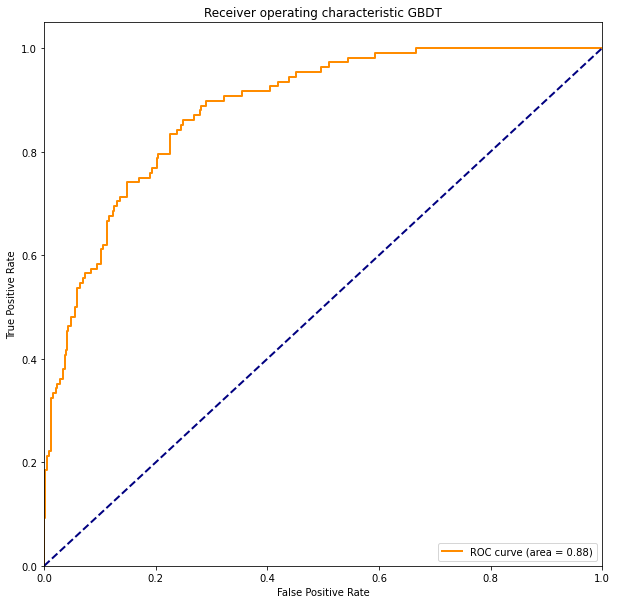

In [64]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predprob)

roc_auc=metrics.auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic GBDT')
plt.legend(loc="lower right")
plt.show()

In [74]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x6, y, test_size = 0.2, random_state=0)
gbdt1 = GradientBoostingClassifier(learning_rate=0.1,n_estimators=290,max_depth=8, min_samples_split =7,random_state=0)
gbdt1.fit(X_train1,y_train1)

y_predprob1 = gbdt1.predict_proba(X_test1)[:,1]
print(metrics.roc_auc_score(y_test1, y_predprob1))

0.8712664277180405


In [77]:
from xgboost import XGBClassifier

In [91]:
df_x = pd.read_csv('strcom.csv')

In [93]:
df_x = df_x.drop(['Unnamed: 0'],axis=1)

In [96]:
df_x

,piezo,mean absolute deviation in relative bond length,max relative bond length,min relative bond length,minimum neighbor distance variation,maximum neighbor distance variation,range neighbor distance variation,mean neighbor distance variation,avg_dev neighbor distance variation,mean absolute deviation in relative cell size,...,band center,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,dist from 1 clusters |APE| < 0.010,dist from 3 clusters |APE| < 0.010,dist from 5 clusters |APE| < 0.010,piezo_cl
0,0.444920,0.053873,1.047139,0.933305,0.153749,0.223769,0.070019,0.193837,0.034208,0.077405,...,5.653612,0.209607,0.038059,-0.267904,-0.204228,0.063676,0.701020,0.703350,0.710769,0
1,0.170635,0.086567,1.094726,0.808986,0.017166,0.209501,0.192336,0.144666,0.059831,0.144966,...,5.948123,0.792998,0.142625,-0.338381,-0.338381,0.000000,0.042426,0.053001,0.061556,0
2,0.044730,0.155617,1.218440,0.612015,0.020766,0.235647,0.214881,0.153107,0.076257,0.265675,...,5.728818,0.820234,0.142420,-0.338381,-0.338381,0.000000,0.043640,0.055786,0.063077,0
3,0.525420,0.129469,1.254851,0.679094,0.030068,0.223482,0.193414,0.152875,0.073002,0.212210,...,6.310468,0.917619,0.214967,-0.415606,-0.205744,0.209862,0.659829,0.662359,0.663807,0
4,1.180170,0.085523,1.183043,0.746470,0.079370,0.185899,0.106529,0.156439,0.020435,0.139278,...,5.125398,0.792998,0.178436,-0.338381,-0.338381,0.000000,0.027835,0.037396,0.045798,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,0.299852,0.117433,1.159500,0.804933,0.008878,0.204109,0.195231,0.128550,0.072965,0.222814,...,7.017906,0.894601,0.162920,-0.295049,-0.295049,0.000000,0.578102,0.579302,0.581360,0
2971,1.287492,0.025918,1.056057,0.947495,0.136588,0.165095,0.028507,0.149580,0.008748,0.041882,...,4.866179,0.779730,0.169250,-0.328019,-0.328019,0.000000,0.028972,0.040004,0.045299,1
2972,1.424887,0.083471,1.104596,0.785115,0.070526,0.409067,0.338542,0.234576,0.076158,0.117423,...,6.032056,0.779730,0.123519,-0.295049,-0.295049,0.000000,0.048762,0.057012,0.061114,1
2973,0.321191,0.102300,1.171440,0.852761,0.024214,0.218953,0.194740,0.138593,0.067900,0.168933,...,6.413407,0.894601,0.178934,-0.295049,-0.295049,0.000000,0.444659,0.447249,0.449899,0


In [95]:
df_x = df_x.dropna(axis=0, how='any')

In [97]:
df_y = df_x['piezo']

In [98]:
df_y

0       0.444920
1       0.170635
2       0.044730
3       0.525420
4       1.180170
          ...   
2970    0.299852
2971    1.287492
2972    1.424887
2973    0.321191
2974    1.056212
Name: piezo, Length: 2865, dtype: float64

In [99]:
df_y.to_csv('strcom_y.csv')